#순서
torchvision 을 사용하여 CIFAR10의 학습용 / 시험용 데이터셋을 불러오고, 정규화(nomarlizing)합니다.

합성곱 신경망(Convolution Neural Network)을 정의합니다.

손실 함수를 정의합니다.

학습용 데이터를 사용하여 신경망을 학습합니다.

시험용 데이터를 사용하여 신경망을 검사합니다.

#CIFAR10을 불러오고 정규화하기

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

transforms.ToTensor() - 데이터를 tensor로 바꿔준다.

transforms.Normalize(mean, std, inplace=False) - 정규화한다.

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root = './data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset,batch_size = batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

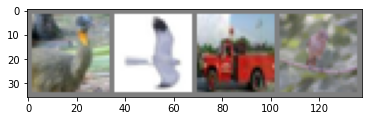

bird  bird  truck bird 


In [ ]:
def imshow(img):
  img = img / 2+0.5
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.show()
# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)
# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

#합성곱 정의
[Pytorch nn과 nn.functional](https://dororongju.tistory.com/143)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#손실 함수와 Optimizer 정의하기

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#신경망 학습하기

이제 재미있는 부분이 시작됩니다. 단순히 데이터를 반복해서 신경망에 입력으로 제공하고, 최적화(Optimize)만 하면 됩니다.

In [ ]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.306
[1,  4000] loss: 2.306
[1,  6000] loss: 2.305
[1,  8000] loss: 2.306
[1, 10000] loss: 2.305
[1, 12000] loss: 2.305
[2,  2000] loss: 2.306
[2,  4000] loss: 2.306
[2,  6000] loss: 2.305
[2,  8000] loss: 2.306
[2, 10000] loss: 2.306
[2, 12000] loss: 2.305
Finished Training


모델 저장

In [ ]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

저장한 모델로 시험용 데이터 평가하기

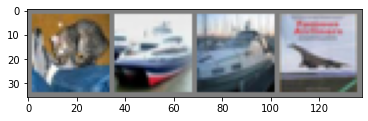

GroundTruth:  cat   ship  ship  plane


In [ ]:
dataiter = iter(testloader)
images,labels = next(dataiter)

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

이제, 저장했던 모델을 불러오기

In [ ]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>